In [1]:
cd

/Users/keithwalcott


In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

In [3]:
# Assign path
path = '/Users/keithwalcott/kw_dms/results/func_scores_temp/'

In [4]:
# List all files in the directory
files = os.listdir(path)

# Create an empty list to store (name, DataFrame) tuples
dataframes_list = []

# Append datasets to the list
for file in files:
    if file.endswith('func_scores.csv'):
        # Remove '.csv' from the file name to use as the DataFrame name
        #df_name = file[:-4]
        df_name = file[:-16]
        # Read the CSV file
        temp_df = pd.read_csv(os.path.join(path, file), usecols=['barcode', 'func_score'])
        # Append the (name, DataFrame) tuple to the list
        dataframes_list.append((df_name, temp_df))


In [5]:
grouped_dataframes = {'4u8c': [], 'Both': [], 'C7': []}

for df_name, df in dataframes_list:
    if df_name.startswith('4u8c'):
        grouped_dataframes['4u8c'].append((df_name, df))
    elif df_name.startswith('Both'):
        grouped_dataframes['Both'].append((df_name, df))
    elif df_name.startswith('C7'):
        grouped_dataframes['C7'].append((df_name, df))


In [6]:
def calculate_pearson_correlation(df1, df2, merge_column, score_column):
    merged_df = pd.merge(df1, df2, on=merge_column)
    correlation = merged_df[f'{score_column}_x'].corr(merged_df[f'{score_column}_y'])
    return correlation **2

# Initialize correlation values for each group
correlation_values = {group: {} for group in grouped_dataframes.keys()}

for group, dfs in grouped_dataframes.items():
    for i in range(len(dfs)):
        for j in range(i+1, len(dfs)):
            df1_name, df1_data = dfs[i]  # Extracting the DataFrame from the tuple
            df2_name, df2_data = dfs[j]  # Extracting the DataFrame from the tuple

            correlation = calculate_pearson_correlation(df1_data, df2_data, 'barcode', 'func_score')
            correlation_values[group][(df1_name, df2_name)] = correlation  # Storing correlation values with DataFrame names


In [7]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import pandas as pd

# # Custom sorting function
# def custom_sort(name):
#     if 'B1' in name:
#         return '0' + name  # Prefixing with '0' ensures B1 comes before B2
#     else:
#         return '1' + name

# # Transform the correlation values into a matrix for each group
# correlation_matrices = {}

# for group in correlation_values:
#     # Get the unique DataFrame names
#     df_names = sorted(set(name for name_pair in correlation_values[group] for name in name_pair), key=custom_sort)

#     # Create an empty DataFrame with names as indices and columns
#     corr_matrix = pd.DataFrame(index=df_names, columns=df_names)

#     # Fill the DataFrame with correlation values
#     for (df1_name, df2_name), corr in correlation_values[group].items():
#         corr_matrix.loc[df1_name, df2_name] = corr
#         corr_matrix.loc[df2_name, df1_name] = corr

#     correlation_matrices[group] = corr_matrix

# # Plotting the heatmaps for each group
# for group, corr_matrix in correlation_matrices.items():
#     plt.figure(figsize=(10, 8))
#     ax = sns.heatmap(corr_matrix.astype(float), annot=True, cmap='Greens', vmin=0, vmax=1, zorder=2)
#     plt.title(f"Pearson Correlation Heatmap for Group {group}")
    
#     # Rotate the X-axis labels
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right',rotation_mode='anchor')
    
#     # Increase font size for annotations
#     ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
    
#     # Save the heatmap as an image file
#     #plt.savefig(f'{group}_heatmap.png', bbox_inches='tight')
    
#     plt.show()
    

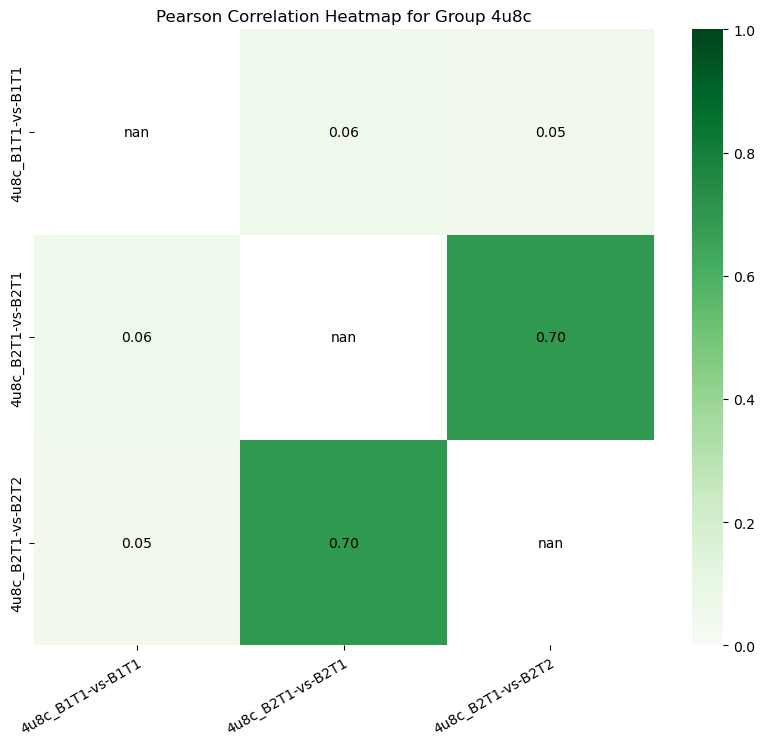

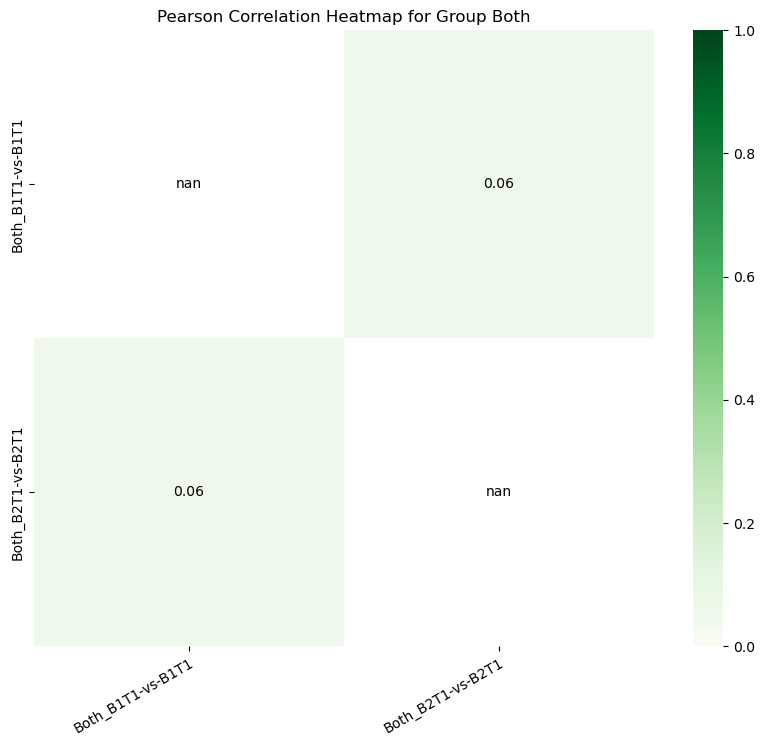

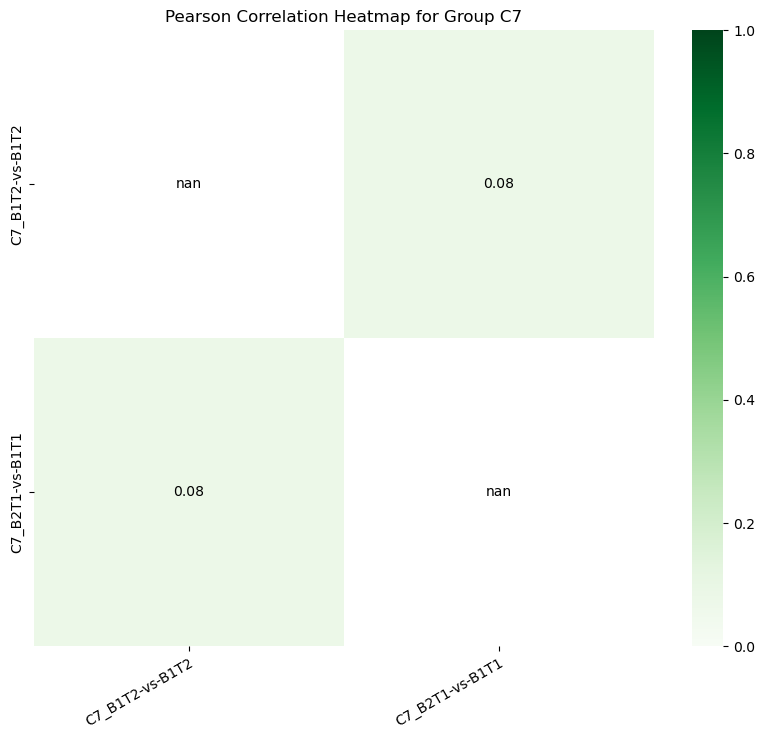

In [8]:
# Custom sorting function
def custom_sort(name):
    if 'B1' in name:
        return '0' + name  # Prefixing with '0' ensures B1 comes before B2
    else:
        return '1' + name

# Transform the correlation values into a matrix for each group
correlation_matrices = {}

for group in correlation_values:
    # Get the unique DataFrame names
    df_names = sorted(set(name for name_pair in correlation_values[group] for name in name_pair), key=custom_sort)

    # Create an empty DataFrame with names as indices and columns
    corr_matrix = pd.DataFrame(index=df_names, columns=df_names)

    # Fill the DataFrame with correlation values
    for (df1_name, df2_name), corr in correlation_values[group].items():
        corr_matrix.loc[df1_name, df2_name] = corr
        corr_matrix.loc[df2_name, df1_name] = corr

    correlation_matrices[group] = corr_matrix


for group, corr_matrix in correlation_matrices.items():
    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(corr_matrix.astype(float), annot=False, cmap='Greens', vmin=0, vmax=1)

    # Add annotations manually
    for i in range(len(corr_matrix)):
        for j in range(len(corr_matrix)):
            ax.annotate(f'{corr_matrix.iloc[i, j]:.2f}', xy=(j + 0.5, i + 0.5), ha='center', va='center', fontsize=10, color='black')

    plt.title(f"Pearson Correlation Heatmap for Group {group}")

    # Rotate the X-axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right', rotation_mode='anchor')

    # Save the heatmap as an image file
    plt.savefig(f'{group}_heatmap.png', bbox_inches='tight')

    plt.show()